In [11]:
# questo script analizza il caso b1=b2=inf in cui partiamo da dato iniz. a scalino 
# la X è supposta essere ancora 0, ma le x non sono più normali standard ma hanno una loro varianza sigma_t,
# e vediamo a cosa converge a tempi lunghi di ord(1), se è un'altra funzione a gradino e come si sposta

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import fsolve

In [12]:
# initialize all the parameters
b1 = 9
b2 = 9
alfa1 = 1
alfa2 = 1/2
alfa3 = 1
sigma = 1
Nspin = 10000
Niter = 500000
dt = 0.01  # così è ordine 1


la media iniziale è: -0.9868


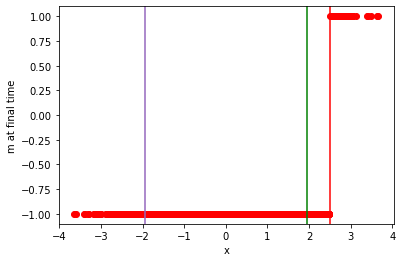

In [13]:
X = 0 #initialize the average of the diffusions

X0 = 2.5 # equivale a -2m0

x = np.random.normal(0,sigma,Nspin) 
#print(np.amax(x))
#print(np.amin(x))

########### dati a scalino
m = np.zeros(Nspin)
for i in range(0,Nspin):
    if x[i] > X0:
        m[i] = 1
    else: m[i] = -1
    

m1 = np.repeat(m[0],Niter) #these will store 
m2 = np.repeat(m[1],Niter) #the first two magnetizations

M = np.repeat(np.mean(m),Niter)  #initialize the average of the magnetizations

print("la media iniziale è:", np.mean(m))



# this stores the scalino function
x0 = np.repeat(0.,Niter)

# this stores the sigma as a function of time
s = np.zeros(Niter) + 1.

# this stores the time
t = 0

# this defines the implicit function for finding the scalino at every time:
def h(x):
    return 1 - 2*norm.cdf(x-X,0,s[i]) - M[i]


Y = np.linspace(-5,5, num = 200)

sigma1 = sigma/math.sqrt(2*alfa2)


# le equazioni per la x0(X) ai bordi sx e dx del manifold stabile
def man_1(y0):
    return y0 + Y - 2*norm.cdf(y0-Y,0,sigma1)

def man_2(y0):
    return y0 + Y + 2*norm.cdf(-y0+Y,0,sigma1)



y0 = fsolve(man_1, np.zeros(200))

y1 = fsolve(man_2, np.zeros(200))





# find the new stable point xo(X), when x0 + X > 0
def f(y):
    return y - 2*norm.cdf(y-X,0,sigma) + X


# find the new stable point xo(X), when x0 + X < 0
def g(y): 
    return y + 2*norm.cdf(-y+X,0,sigma) +X


plt.plot(x,m, 'ro')
plt.xlabel('x')
plt.ylabel('m at final time')
plt.axvline(X0, color='r')
#plt.axvline(2*norm.cdf(x0-X,0,sigma) - X, color='b')
#plt.axvline(-2*norm.cdf(-x0+X,0,sigma) -X, color='C3')
plt.axvline(fsolve(f, X0), color='g')
plt.axvline(fsolve(g,X0), color ='C4')
plt.show()

# draw the new x_i's for the dynamics simulation: è necessario questo step o no?
#x = np.random.normal(X,1,Nspin) 


In [14]:
for i in range(0,Niter):
        t = t + dt
        M[i] = np.mean(m)  #update the running values
        m1[i] = m[0]
        m2[i] = m[1]
        noise = np.random.normal(0,1,Nspin) # draw the updated noise vector 
        #s[i] = s[i-1] + sigma**2/alfa2*math.exp(-2*alfa2*t)*(1-math.exp(-2*alfa2*dt))
        #x0[i] = fsolve(h,0)
        u1 = np.random.random_sample(Nspin) # draw N uniform samples to check the update rule 
        u2 = np.random.random_sample(Nspin)
        w1 = Nspin*((1 + m)/2)*(1-np.tanh(b1*(m + x) + b2*(M[i] + X)))*dt > u1  #accept the update rules with the right proba
        w2 = Nspin*((1 - m)/2)*(1+np.tanh(b1*(m + x) + b2*(M[i] + X)))*dt > u2
        m =  m - w1*(2./Nspin) + w2*(2./Nspin)   
        #x = x - (alfa2/Nspin)*(x-X)*dt + sigma/(Nspin**(1/2))*noise*(dt**(1/2))

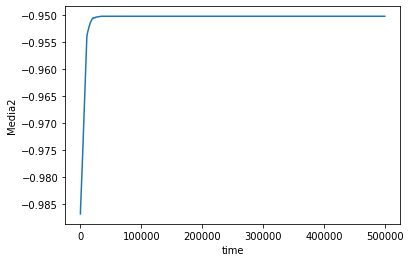

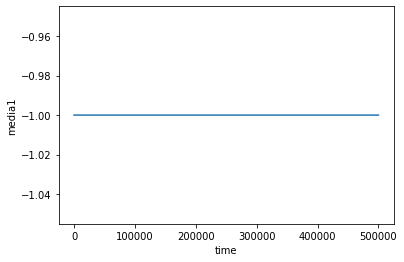

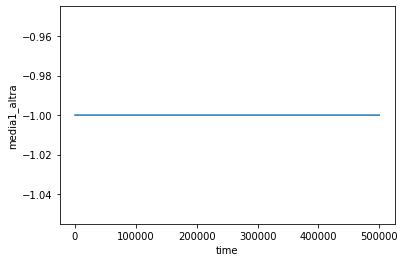

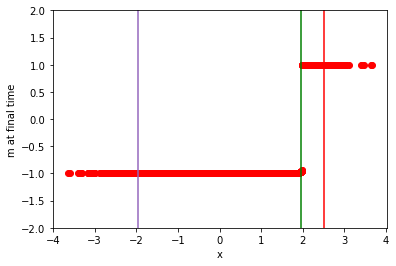

il valore previsto con l eq. per x0(X) quando x0 +X > 0: [-0.9486645]
il valore previsto con l eq. per x0(X) quando x0 +X < 0: [0.9486645]
l ultimo valore trovato al tempo finale per la M: -0.9501453000000029
[1.9486645]


In [15]:
plt.plot(M)
plt.xlabel('time')
plt.ylabel('Media2')
plt.show() 

plt.plot(m1)
plt.xlabel('time')
plt.ylabel('media1')
plt.show() 

plt.plot(m2)
plt.xlabel('time')
plt.ylabel('media1_altra')
plt.show() 

plt.plot(x,m,'ro')
plt.xlabel('x')
plt.axvline(X0, color='r')
plt.ylabel('m at final time')
#plt.axvline(2*norm.cdf(x0-X,0,sigma) - X, color='b')
plt.axvline(fsolve(f, X0), color='g')
plt.axvline(fsolve(g,X0), color ='C4')
plt.ylim(-2,2)
plt.show()


MX = - norm.cdf(fsolve(f, X0),X,sigma) + norm.cdf(-fsolve(f, X0),X,sigma)
MGX = - norm.cdf(fsolve(g, X0),X,sigma) + norm.cdf(-fsolve(g, X0),X,sigma)

print('il valore previsto con l eq. per x0(X) quando x0 +X > 0:', MX)
print('il valore previsto con l eq. per x0(X) quando x0 +X < 0:', MGX)

print('l ultimo valore trovato al tempo finale per la M:', M[Niter-1])

print(fsolve(f,X0))
#xbar1 = fsolve(f, x0)
#MX2 = -norm.cdf(xbar1,X,sigma) +norm.cdf(-xbar1,X,sigma)
#print('il valore previsto per M finale con x0(X) = x0 (valido per x0 > 0):', MX2)

#xbar2 = fsolve(g,x0)
#MX3 = -norm.cdf(xbar2,X,sigma) +norm.cdf(-xbar2,X,sigma)


# confronta questo punto con l'equazione che abbiamo trovato noi

# e fallo anche per valori iniziali di m non centrati in 0, per studiare la dipendenza 
# dal punto iniziale

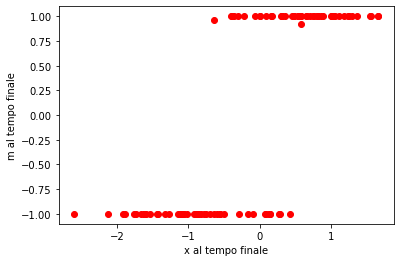

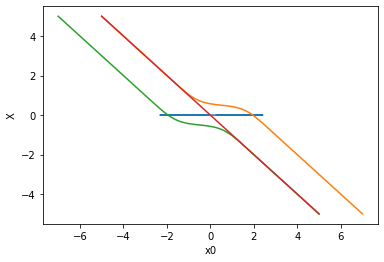

In [59]:
plt.plot(x,m,'ro')
plt.xlabel('x al tempo finale')
plt.ylabel('m al tempo finale')
plt.show()


# plot delle regioni di piano stabili 

X = np.zeros(Niter)
plt.plot(x0,X)
plt.plot(y0,Y)
plt.plot(y1,Y)
plt.plot(-Y,Y)
#plt.xlim(-10,10)
#plt.ylim(-10,10)
plt.xlabel('x0')
plt.ylabel('X')
plt.show() 


